In [138]:
%matplotlib inline
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import json

In [139]:
data = json.load(open("tmp.txt","r"))

In [140]:
dijkstra = data['dijkstra']
dijk_total = sum(dijkstra)
dijk_total

0.03140500000000008

In [141]:
setcov = data['set cover check time']
setcov_tot = sum(setcov)
setcov_tot

0.04409899999999999

In [142]:
inc_cap = data['increase capacity time']
inc_cap_tot = sum(inc_cap)
inc_cap_tot

0.10503199999999999

In [143]:
fae = data['find and enlarge']
fae_tot = sum(fae)
fae_tot

0.0634420000000001

In [144]:
mne = data['make new edge']
mne_tot = sum(mne)
mne_tot

0.016552000000000015

In [145]:
aug_tot = sum(data['augment flow'])

In [146]:
list(data.keys())

[u'connectivity check time',
 u'dijkstra',
 u'find and enlarge',
 u'iteration init',
 u'fcla initialization',
 u'greedy set cover time',
 u'result final calculation time',
 u'bipartite graph size',
 u'objective',
 u'number of facilities',
 u'set cover check time',
 u'Created',
 u'capacity of facilities',
 u'prematching time',
 u'facilities left after termination',
 u'reading file',
 u'increase capacity time',
 u'augment flow',
 u'make new edge',
 u'total time',
 u'lack facility allocation time',
 u'number of iterations',
 u'runtime',
 u'update potentials',
 u'lambda']

In [147]:
# for set cover
plotdata = {'Total WMA time':data['runtime'],
            'Total execution time':data['total time'],
            "Reading file":data['reading file'],
            "Initialization":data['fcla initialization'],
            'lack facility allocation time': data['lack facility allocation time'],
            'Set Cover time': setcov_tot,
            'Matching': inc_cap_tot + data['prematching time'],
            'Other': data['runtime'] - data['lack facility allocation time'] - 
            setcov_tot - inc_cap_tot + data['prematching time']}
df = pd.DataFrame(plotdata,index=range(1))

In [148]:
df = df.T
df.reset_index(level=0, inplace=True)
df = df.rename(columns={0:"time"})

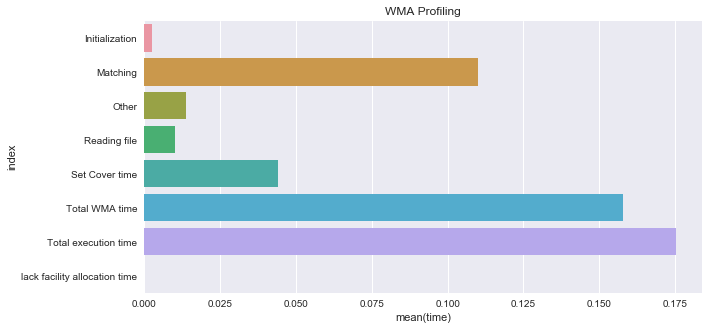

In [149]:
f, ax = plt.subplots(figsize=(10, 5))
sb.barplot(x="time", y="index",data=df)
plt.title("WMA Profiling")

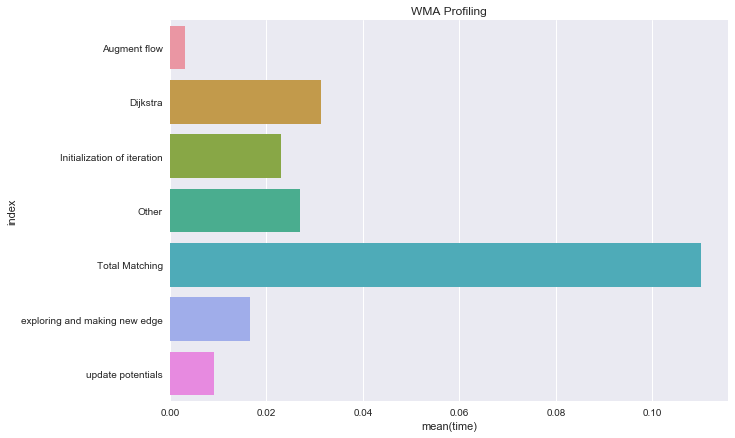

In [150]:
# for matching
plotdata = {'Total Matching':inc_cap_tot + data['prematching time'],
            'Dijkstra': dijk_total,
            'Augment flow': aug_tot,
            'exploring and making new edge': mne_tot,
            'update potentials': sum(data['update potentials']),
            'Initialization of iteration': sum(data['iteration init']),
            'Other': inc_cap_tot + data['prematching time'] - sum(data['iteration init']) 
            - dijk_total - aug_tot - mne_tot - sum(data['update potentials'])}
df = pd.DataFrame(plotdata,index=range(1))
df = df.T
df.reset_index(level=0, inplace=True)
df = df.rename(columns={0:"time"})
f, ax = plt.subplots(figsize=(10, 7))
sb.barplot(x="time", y="index",data=df)
plt.title("WMA Profiling")

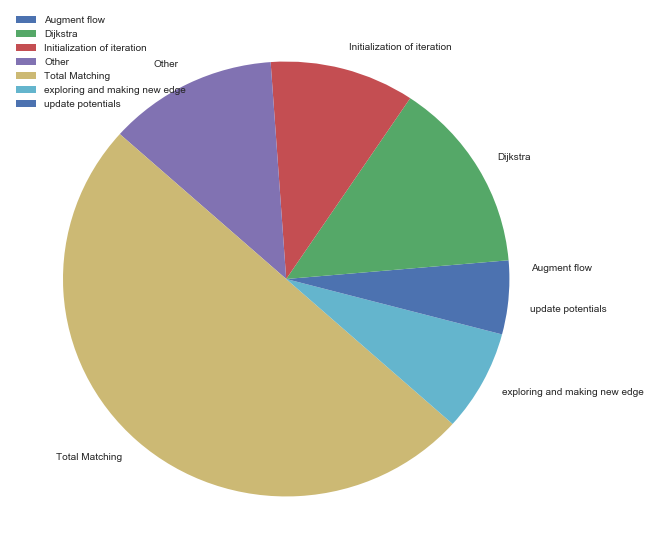

In [151]:
f, ax = plt.subplots(figsize=(10, 10))
plt.pie(df['time']*100,labels=df['index'])
plt.legend()